<a href="https://colab.research.google.com/github/hsiaom26/DS4CS/blob/master/T09_ProblematicData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problematic Data
* Unbalanced Data
* Outlier-2 (PCA-based)
* Overfit

## Unbalanced Data

* Oversampling: Randomly replicate data from minority class. However, if some data is mislabled, the accuracy might be affected. Also, the distribution changes.
* Undersampling: Randomly delete data from majority class. However, the distribution changes.
* Resampling: Create new data samples by combining several old data smaples.
* We will talk about GAN (Generative Adversarial Network) model later.

Plase take a look at the following website. It provides several advanced methods to deal with unbalanced data.
https://imbalanced-learn.readthedocs.io/en/stable/



### Random Over Sampler

In [ ]:
# https://imbalanced-learn.org/stable/over_sampling.html

from sklearn.datasets import make_classification
X, y = make_classification(n_samples=5000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.01, 0.05, 0.94],
                           class_sep=0.8, random_state=0)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

from collections import Counter
print(sorted(Counter(y_resampled).items()))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


[(0, 4674), (1, 4674), (2, 4674)]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
import numpy as np
unique, counts = np.unique(y_resampled, return_counts = True)
print(unique, counts)

[0 1 2] [4674 4674 4674]


### SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE is one of the resampling methods. See figure 1 of [this paper](https://www.hindawi.com/journals/ddns/2015/562724/). It generates new data points by using a data in the minority class with its k (k=5 in the figure) neighbors. 

### Adaptive Synthetic (ADASYN)

ADASYN is more complex. [Here is the original paper.](https://sci2s.ugr.es/keel/pdf/algorithm/congreso/2008-He-ieee.pdf) 

Its a improved version of Smote. What it does is same as SMOTE just with a minor improvement. After creating those sample it adds a random small values to the points thus making it more realistic. In other words instead of all the sample being linearly correlated to the parent they have a little more variance in them i.e they are bit scattered.




### Different unbalanced data

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_resampled, y_resampled)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
def create_dataset(n_samples=1000, weights=(0.01, 0.01, 0.98), n_classes=3, class_sep=0.8, n_clusters=1):
    return make_classification(n_samples=n_samples, n_features=2,
                               n_informative=2, n_redundant=0, n_repeated=0,
                               n_classes=n_classes,
                               n_clusters_per_class=n_clusters,
                               weights=list(weights),
                               class_sep=class_sep, random_state=0)

def plot_resampling(X, y, sampling, ax):
    X_res, y_res = sampling.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor='k')
    # make nice plotting
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    return Counter(y_res)

def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

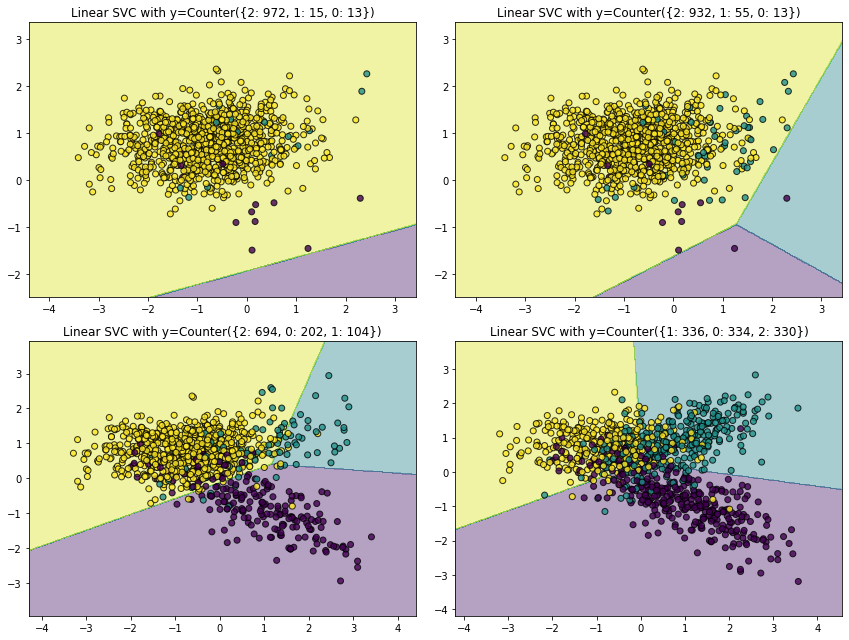

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 9))

ax_arr = (ax1, ax2, ax3, ax4)
weights_arr = ((0.01, 0.01, 0.98), (0.01, 0.05, 0.94),
               (0.2, 0.1, 0.7), (0.33, 0.33, 0.33))
for ax, weights in zip(ax_arr, weights_arr):
    X, y = create_dataset(n_samples=1000, weights=weights)
    clf = LinearSVC().fit(X, y)
    plot_decision_function(X, y, clf, ax)
    ax.set_title('Linear SVC with y={}'.format(Counter(y)))
fig.tight_layout()

### Random over-sampling to balance the data set

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


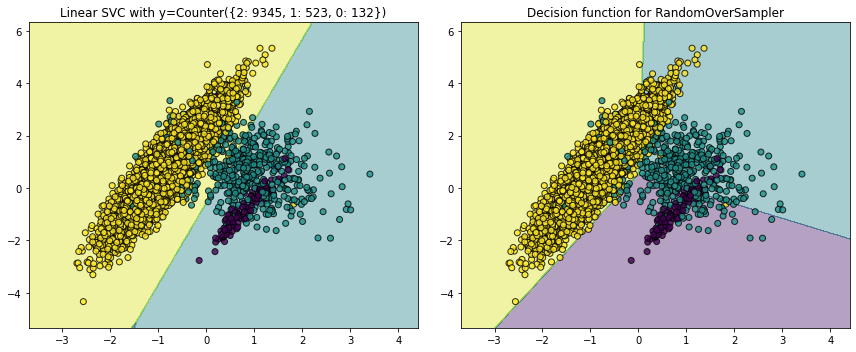

In [ ]:
from imblearn.pipeline import make_pipeline

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
X, y = create_dataset(n_samples=10000, weights=(0.01, 0.05, 0.94))
clf = LinearSVC().fit(X, y)
plot_decision_function(X, y, clf, ax1)
ax1.set_title('Linear SVC with y={}'.format(Counter(y)))

pipe = make_pipeline(RandomOverSampler(random_state=0), LinearSVC())
pipe.fit(X, y)
plot_decision_function(X, y, pipe, ax2)
ax2.set_title('Decision function for RandomOverSampler')
fig.tight_layout()

### ADASYN and SMOTE

In [ ]:
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import (SMOTE, BorderlineSMOTE, SVMSMOTE, SMOTENC)

In [ ]:
from imblearn.base import BaseSampler
class FakeSampler(BaseSampler):
    _sampling_type = 'bypass'

    def _fit_resample(self, X, y):
        return X, y

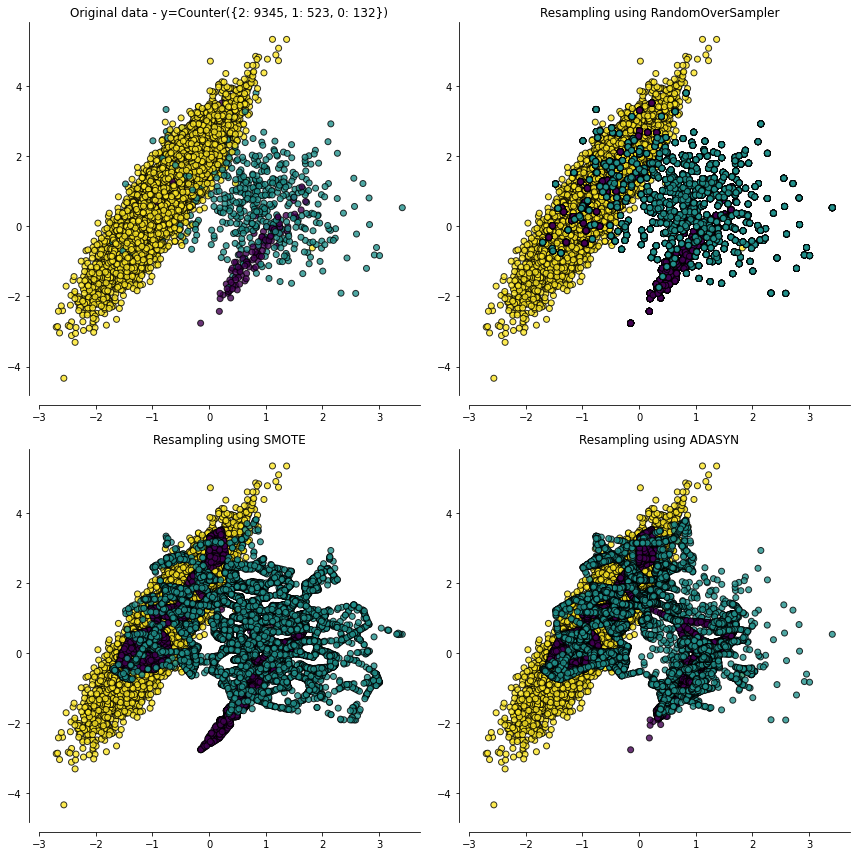

In [ ]:
import warnings
warnings.filterwarnings('ignore') # imblearn outputs some warnings

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
X, y = create_dataset(n_samples=10000, weights=(0.01, 0.05, 0.94))
sampler = FakeSampler()
clf = make_pipeline(sampler, LinearSVC())
plot_resampling(X, y, sampler, ax1)
ax1.set_title('Original data - y={}'.format(Counter(y)))

ax_arr = (ax2, ax3, ax4)
for ax, sampler in zip(ax_arr, (RandomOverSampler(random_state=0),
                                SMOTE(random_state=0),
                                ADASYN(random_state=0))):
    clf = make_pipeline(sampler, LinearSVC())
    clf.fit(X, y)
    plot_resampling(X, y, sampler, ax)
    ax.set_title('Resampling using {}'.format(sampler.__class__.__name__))
fig.tight_layout()
plt.show()

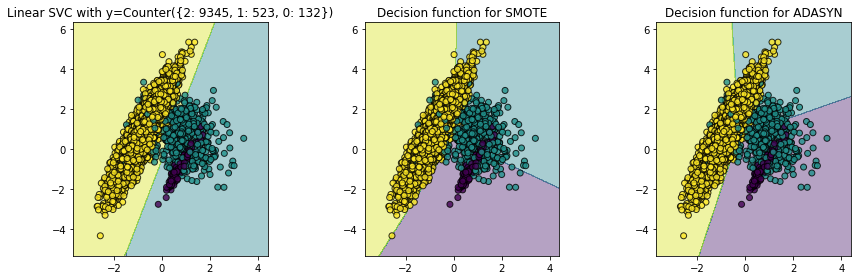

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
X, y = create_dataset(n_samples=10000, weights=(0.01, 0.05, 0.94))

clf = LinearSVC().fit(X, y)
plot_decision_function(X, y, clf, ax1)
ax1.set_title('Linear SVC with y={}'.format(Counter(y)))
sampler = SMOTE()
clf = make_pipeline(sampler, LinearSVC())
clf.fit(X, y)
plot_decision_function(X, y, clf, ax2)
ax2.set_title('Decision function for {}'.format(sampler.__class__.__name__))
sampler = ADASYN()
clf = make_pipeline(sampler, LinearSVC())
clf.fit(X, y)
plot_decision_function(X, y, clf, ax3)
ax3.set_title('Decision function for {}'.format(sampler.__class__.__name__))
fig.tight_layout()

### SMOTE/ADASYN result

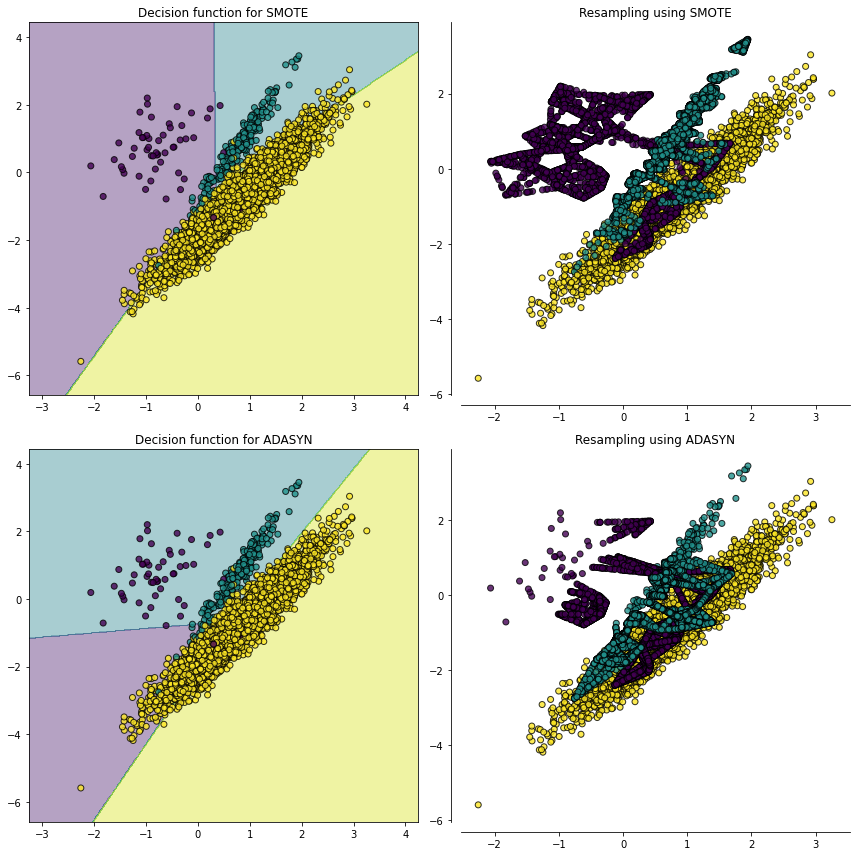

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
X, y = create_dataset(n_samples=5000, weights=(0.01, 0.05, 0.94),
                      class_sep=0.8)

ax_arr = ((ax1, ax2), (ax3, ax4))
for ax, sampler in zip(ax_arr, (SMOTE(random_state=0),
                                ADASYN(random_state=0))):
    clf = make_pipeline(sampler, LinearSVC())
    clf.fit(X, y)
    plot_decision_function(X, y, clf, ax[0])
    ax[0].set_title('Decision function for {}'.format(
        sampler.__class__.__name__))
    plot_resampling(X, y, sampler, ax[1])
    ax[1].set_title('Resampling using {}'.format(
        sampler.__class__.__name__))
fig.tight_layout()

## PCA-based outliers

Outliers will be the data points that are not well described by the model!

* Standard Deviation (z score)
* Boxplots (IQR = Q3-Q1, Q1-k*IQR)
* PCA-based
* SVM (see Orange)

[Reference](https://nirpyresearch.com/detecting-outliers-using-mahalanobis-distance-pca-python/)


Remind: 
In PCA (Principal Component Analysis) the set of measurements $X$ is transformed into an equivalent set $X’=XW$ by a linear transformation $W$, such that all the new principal componentsare linearly independent. In statistics $X’$ is called the factor scores. The linear transformation in PCA is such that it minimizes the covariance between the different rows of $X’$. That means this process only uses the $X$ data, not the $Y$ values.

### PLS (Partial Least Squares Regression)

PLS is based on finding a similar linear transformation, but accomplishes the same task by maximizing the covariance between $Y$ and $X’$. In other words, PLS takes into account both transformed data and response values and in doing so will improve on some of the limitations on PCA.


In general multivariate PLS, the model is written as:

$X = T \times P^\top + E $

$X = n*m, T = n*k (scores), P^\top = k(loadings)*m, E =n*m$

$n$ samples, $m$ features.

$Y = U×Q^\top +F$

The PLS model is built in such a way to maximize the covariance between $T$ and $U$.

https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html


So to find outliers, we can find data with largest $E$ (aka Q-residuals), or largest $T$ (aka Hotelling's T-squared). 

Q-residuals account for the variations in the data that are not explained by the model as built. An outlier will have large Q-residual when compared to the corresponding residuals of the other points. Q-residuals are calculated in practice by taking the sum of squares of each row of the error matrix.

T-squared look at the variations within the model itself. Hotelling's T-squared is calculated by summing the squares of the rows of the scores matrix T, after normalising each by its standard deviation.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import savgol_filter

In [ ]:
# https://www.kaggle.com/rajyellow46/wine-quality

data = pd.read_csv('https://drive.google.com/uc?id=1_5rqomS1sswoR-_MsSPErmTZAJptzPvZ')
Y = data[data.type == 'white']['quality']
X = data[data.type == 'white'].drop(['type','quality'], axis = 1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,NaN,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [ ]:
print(X.isna().sum())
for ser in X:
  X[ser].fillna(value = X[ser].mean(), inplace = True)
print(X.isna().sum())

fixed acidity           8
volatile acidity        7
citric acid             2
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      7
sulphates               2
alcohol                 0
dtype: int64
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


In [ ]:
from sklearn.cross_decomposition import PLSRegression
ncomp = 2

# Define PLS object
pls = PLSRegression(n_components = ncomp)
# Fit data
pls.fit(X, Y)
# Get X scores
T = pls.x_scores_
# Get X loadings
P = pls.x_loadings_
# Calculate error array
Err = X - np.dot(T,P.T)
# Calculate Q-residuals (sum over the rows of the error array)
Q = np.sum(Err**2, axis=1)
# Calculate Hotelling's T-squared (note that data are normalized by default)
Tsq = np.sum((pls.x_scores_/np.std(pls.x_scores_, axis=0))**2, axis=1)

In [ ]:
# set the confidence level
conf = 0.95
from scipy.stats import f
# Calculate confidence level for T-squared from the ppf of the F distribution
Tsq_conf = f.ppf(q=conf, dfn = ncomp, dfd = X.shape[0])*ncomp*(X.shape[0]-1)/(X.shape[0]-ncomp)
# Estimate the confidence level for the Q-residuals
i = np.max(Q)+1
while 1-np.sum(Q>i)/np.sum(Q>0) > conf:
    i -= 1
Q_conf = i

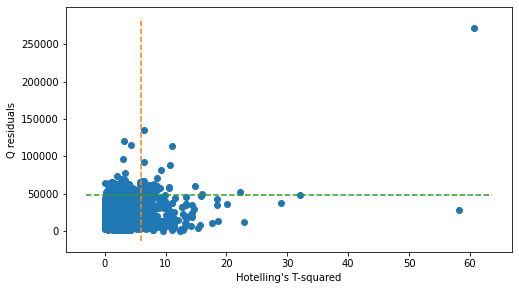

In [ ]:
import matplotlib.pyplot as plt
ax = plt.figure(figsize=(8,4.5))

plt.plot(Tsq, Q, 'o')
plt.plot([Tsq_conf,Tsq_conf],[plt.axis()[2],plt.axis()[3]],  '--')
plt.plot([plt.axis()[0],plt.axis()[1]],[Q_conf,Q_conf],  '--')
plt.xlabel("Hotelling's T-squared")
plt.ylabel('Q residuals')
plt.show()

Q: then find the outliers and make a new model using inliers. Does the model improve?

### PCA

Now it’s time to run a PCA decomposition of these data and produce a score plot with the first two principal components.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA()
T = pca.fit_transform(StandardScaler().fit_transform(X))

print(pca.explained_variance_ratio_)

[0.29293028 0.14303955 0.11097785 0.09260406 0.08853273 0.08534557
 0.06609423 0.05457406 0.03767632 0.02633155 0.0018938 ]


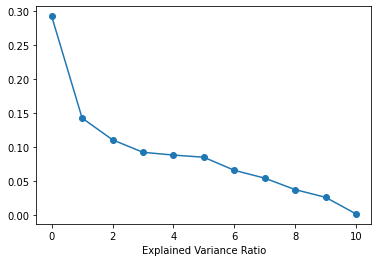

In [ ]:
def plotData(plt, data):
  x = [p[0] for p in data]
  y = [p[1] for p in data]
  plt.plot(x, y, '-o')

plotData(plt, list(zip(range(X.shape[1]), pca.explained_variance_ratio_)))
plt.xlabel("PC")
plt.xlabel("Explained Variance Ratio")
plt.show()

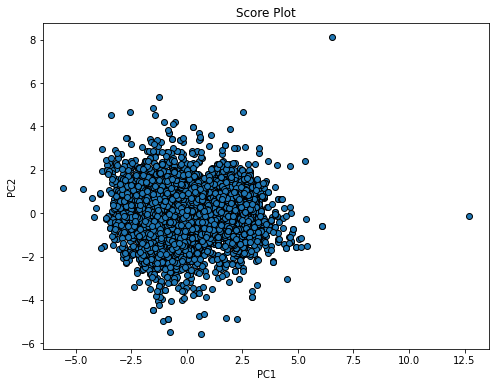

In [ ]:
# Score plot of the first 2 PC
fig = plt.figure(figsize=(8,6))
plt.scatter(T[:, 0], T[:, 1], edgecolors='k', cmap='jet')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Score Plot')
plt.show()

Q: Find some way to identify outliers. Make models without outliers. Does the performance of the model imporve?

## Overfit and underfit

Ref: [WillKoehrsen](https://github.com/WillKoehrsen/Data-Analysis/blob/master/over_vs_under/Over%20vs%20Under%20Fitting%20Example.ipynb)



In [ ]:
# Set the random seed for reproducible results
np.random.seed(42)

# "True" generating function representing a process in real life
def true_gen(x):
    y = np.sin(1.2 * x * np.pi) 
    return(y)

# x values and y value with a small amount of random noise
x = np.sort(np.random.rand(120))
y = true_gen(x) + 0.1 * np.random.randn(len(x))

In [ ]:
# Random indices for creating training and testing sets
random_ind = np.random.choice(list(range(120)), size = 120, replace=False)
xt = x[random_ind]
yt = y[random_ind]

# Training and testing observations
train = xt[:int(0.7 * len(x))]
test = xt[int(0.7 * len(x)):]

y_train = yt[:int(0.7 * len(y))]
y_test = yt[int(0.7 * len(y)):]

# Model the true curve
x_linspace = np.linspace(0, 1, 1000)
y_true = true_gen(x_linspace)

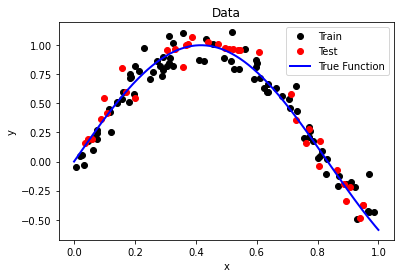

In [ ]:
# Visualize observations and true curve
plt.plot(train, y_train, 'ko', label = 'Train'); 
plt.plot(test, y_test, 'ro', label = 'Test')
plt.plot(x_linspace, y_true, 'b-', linewidth = 2, label = 'True Function')
plt.legend()
plt.xlabel('x'); plt.ylabel('y'); plt.title('Data');

### Polynomial Model

We want to try and capture the data using a polynomial function. A polynomial is defined by the degree, or the highest power to for the x-values.

A line has a degree of 1 because it is of the form $y = b_1*x + b_0$ where $b_1$ is the slope and $b_0$ is the intercept.

A third degree polynomial would have the form $y = b_3 * x^3 + b_2 * x^2 + b_1 * x + b_0$ and so on. The higher the degree of the polynomial, the more flexible the model.

The following function creates a polynomial with the specified number of degrees and plots the results.

In [ ]:
# Scikit-Learn for fitting models
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
def fit_poly(train, y_train, test, y_test, degrees, plot='train', return_scores=False):
    
    # Create a polynomial transformation of features
    features = PolynomialFeatures(degree=degrees, include_bias=False)
    
    # Reshape training features for use in scikit-learn and transform features
    train = train.reshape((-1, 1))
    train_trans = features.fit_transform(train)
    
    # Create the linear regression model and train
    model = LinearRegression()
    model.fit(train_trans, y_train)
    
    # Calculate the cross validation score
    cross_valid = cross_val_score(model, train_trans, y_train, scoring='neg_mean_squared_error', cv = 5)
    
    # Training predictions and error
    train_predictions = model.predict(train_trans)
    training_error = mean_squared_error(y_train, train_predictions)
    
    # Format test features
    test = test.reshape((-1, 1))
    test_trans = features.fit_transform(test)
    
    # Test set predictions and error
    test_predictions = model.predict(test_trans)
    testing_error = mean_squared_error(y_test, test_predictions)
    
    # Find the model curve and the true curve
    x_curve = np.linspace(0, 1, 100)
    x_curve = x_curve.reshape((-1, 1))
    x_curve_trans = features.fit_transform(x_curve)
    
    # Model curve
    model_curve = model.predict(x_curve_trans)
    
    # True curve
    y_true_curve = true_gen(x_curve[:, 0])
    
    # Plot observations, true function, and model predicted function
    if plot == 'train':
        plt.plot(train[:, 0], y_train, 'ko', label = 'Observations')
        plt.plot(x_curve[:, 0], y_true_curve, linewidth = 4, label = 'True Function')
        plt.plot(x_curve[:, 0], model_curve, linewidth = 4, label = 'Model Function')
        plt.xlabel('x'); plt.ylabel('y')
        plt.legend()
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.title('{} Degree Model on Training Data'.format(degrees))
        plt.show()
        
    elif plot == 'test':
        # Plot the test observations and test predictions
        plt.plot(test, y_test, 'o', label = 'Test Observations')
        plt.plot(x_curve[:, 0], y_true_curve, 'b-', linewidth = 2, label = 'True Function')
        plt.plot(test, test_predictions, 'ro', label = 'Test Predictions')
        plt.ylim(-1, 1.5); plt.xlim(0, 1)
        plt.legend(), plt.xlabel('x'), plt.ylabel('y'); plt.title('{} Degree Model on Testing Data'.format(degrees)), plt.show();
    
    # Return the metrics
    if return_scores:
        return training_error, testing_error, -np.mean(cross_valid)

### Underfitting

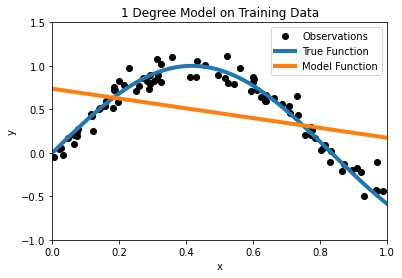

In [ ]:
fit_poly(train, y_train, test, y_test, degrees = 1, plot='train')

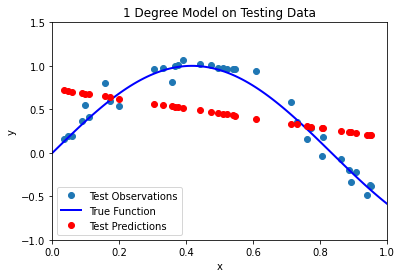

In [ ]:
fit_poly(train, y_train, test, y_test, degrees = 1, plot='test')

### Overfitting

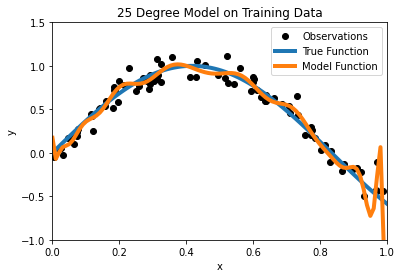

In [ ]:
fit_poly(train, y_train, test, y_test, plot='train', degrees = 25)

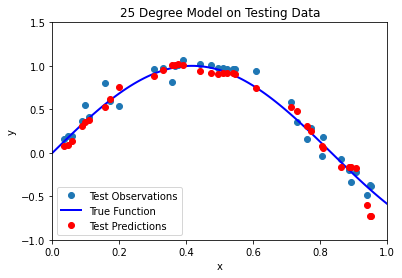

In [ ]:
fit_poly(train, y_train, test, y_test, degrees=25, plot='test')

### Balanced Model

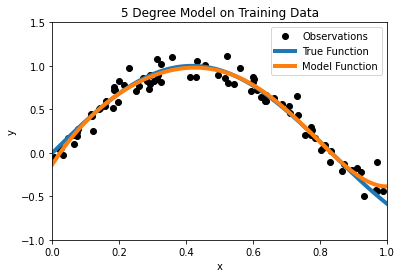

In [ ]:
fit_poly(train, y_train, test, y_test, plot='train', degrees = 5)

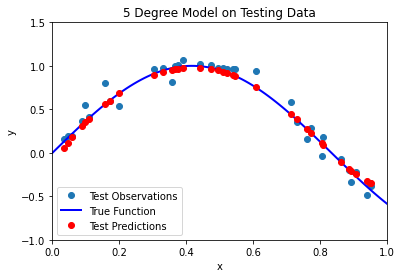

In [ ]:
fit_poly(train, y_train, test, y_test, degrees=5, plot='test')

### Validation Dataset

To pick the optimal model, we need to use a validation set. Cross validation is even better than a single validation set because it uses numerous validation sets created from the training data. In this case, we are using 5 different validation sets. The model that performs best on the cross validation is usually the optimal model because it has shown that it can learn the relationships while not overfitting.

In [ ]:
# Range of model degrees to evaluate
degrees = [int(x) for x in np.linspace(1, 40, 40)]

# Results dataframe
results = pd.DataFrame(0, columns = ['train_error', 'test_error', 'cross_valid'], index = degrees)

# Try each value of degrees for the model and record results
for degree in degrees:
    degree_results = fit_poly(train, y_train, test, y_test, degree, plot=False, return_scores=True)
    results.loc[degree, 'train_error'] = degree_results[0]
    results.loc[degree, 'test_error'] = degree_results[1]
    results.loc[degree, 'cross_valid'] = degree_results[2]

In [ ]:
print('10 Lowest Cross Validation Errors\n')
train_eval = results.sort_values('cross_valid').reset_index(level=0).rename(columns={'index': 'degrees'})
train_eval.loc[:,['degrees', 'cross_valid']] .head(10)

10 Lowest Cross Validation Errors



,degrees,cross_valid
0,4,0.010549
1,5,0.010637
2,7,0.010665
3,6,0.010887
4,8,0.011182
5,3,0.011695
6,9,0.011757
7,11,0.011769
8,10,0.011902
9,12,0.012642


Minimum Cross Validation Error occurs at 3 degrees.



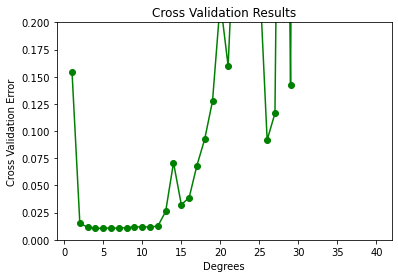

In [ ]:
plt.plot(results.index, results['cross_valid'], 'go-', ms=6)
plt.xlabel('Degrees'); plt.ylabel('Cross Validation Error'); plt.title('Cross Validation Results');
plt.ylim(0, 0.2);
print('Minimum Cross Validation Error occurs at {} degrees.\n'.format(int(np.argmin(results['cross_valid']))))

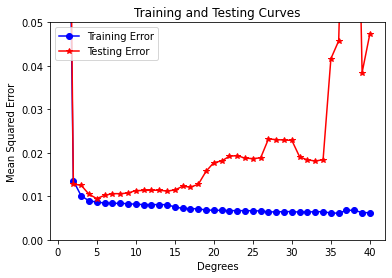


Minimum Training Error occurs at 35 degrees.
Minimum Testing Error occurs at 4 degrees.



In [ ]:
plt.plot(results.index, results['train_error'], 'b-o', ms=6, label = 'Training Error')
plt.plot(results.index, results['test_error'], 'r-*', ms=6, label = 'Testing Error')
plt.legend(loc=2); plt.xlabel('Degrees'); plt.ylabel('Mean Squared Error'); plt.title('Training and Testing Curves');
plt.ylim(0, 0.05); plt.show()

print('\nMinimum Training Error occurs at {} degrees.'.format(int(np.argmin(results['train_error']))))
print('Minimum Testing Error occurs at {} degrees.\n'.format(int(np.argmin(results['test_error']))))

Q: if 4 is the magic number, then how do we remove the effectiveness of 5, 6, 7, 8, ...?

### Regularization


MSE $ = \frac{1}{n} \sum_{i}^{n} (\hat{y_i} - y_i )^2$ 

$ \theta^* = \arg\min_{\theta^*} \frac{1}{n} \sum_{i}^{n} (f_\theta(x_i) - y_i )^2$ 

If some variables (for example, $x_j, j \in U$) make the model overfit, could we minimize their factors ($\theta_j$)?

$ \implies \min [\frac{1}{n} \sum_{i}^{n} (f_\theta(x_i) - y_i )^2 + \sum_{j \in U} \lambda * \theta_j ]$ 

where $\lambda$ is a very large number.

However, we have no idea which variable should be removed! i.e., $U$ is unknown.

$ \implies \min \frac{1}{n} [\sum_{i}^{n} (f_\theta(x_i) - y_i )^2 + \lambda \sum_{j}^{m} \theta_j ]$ 

Q: does it make sense?


The gradient descent now becomes:

$J(\theta) = \frac{1}{2n} [\sum_{i=1}^{n} (f_\theta(x_i) - y_i )^2 + \lambda \sum_{j=1}^{m} \theta_j ]$ 


$\theta_j^{t+1} = \theta_j^{t} - \gamma \frac{\partial f(\theta)}{\partial \theta_j}$, ($j$ = $1$ to $m$)

$\theta_j^{t+1} = \theta_j^{t}(1-\gamma\frac{\lambda}{n}) - \gamma\frac{1}{n} [\sum_{i=1}^{n}(f_\theta(x_i) - y_i)*x_{i,j}]$

Note that $(1-\gamma\frac{\lambda}{n})$ is a number that is close to 1.0 but less than 1.0.



Ref: [Ridge and Lasso Regression](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b)

**Ridge Regression**: In ridge regression, the cost function is altered by adding a penalty equivalent to **square of the magnitude of the coefficients**.

$ \sum_{i}^{n} (f_\theta(x_i) - y_i )^2 + \lambda \sum_{j}^{m} \theta_j^2 $ 

This is equivalent to saying minimizing the cost function under the condition as below.

$ \sum_{i}^{n} (f_\theta(x_i) - y_i )^2 $

$ \sum_{j}^{m} \theta_j^2 < c$, $c>0$

So ridge regression puts constraint on the coefficients ($\theta$). The penalty term ($\lambda$) regularizes the coefficients such that if the coefficients take large values the optimization function is penalized.

So, ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity. 


when $\lambda \to 0$ , the cost function becomes similar to the linear regression cost function. So lower the constraint ($\lambda$) on the features, the model will resemble linear regression model. 



**Lasso Regression**: The cost function for Lasso (least absolute shrinkage and selection operator) regression can be written as 

$ \sum_{i}^{n} (f_\theta(x_i) - y_i )^2 + \lambda \sum_{j}^{m} |\theta_j| $ 


This is equivalent to saying minimizing the cost function under the condition as below.

$ \sum_{i}^{n} (f_\theta(x_i) - y_i )^2 $

$ \sum_{j}^{m} |\theta_j| < t$, $t>0$

The only difference is instead of taking the square of the coefficients (L2), magnitudes are taken into account. This type of regularization (L1) **can lead to zero coefficients** i.e. some of the features are completely neglected for the evaluation of output.

So Lasso regression not only helps in reducing over-fitting but it can help us in feature selection.

In [ ]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
X = cancer.data
Y = cancer.target
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)

In [ ]:
# Read this first!!!
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

lasso = Lasso() # alpha=1.0
lasso.fit(X_train,y_train)

train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.5600974529893081
test score:  0.5832244618818156
number of features used:  4


In [ ]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

print("training score for alpha=0.01:", train_score001)
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha=0.01:", coeff_used001)

training score for alpha=0.01: 0.7037865778498826
test score for alpha =0.01:  0.6641831577726228
number of features used: for alpha=0.01: 10


In [ ]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

print("training score for alpha=0.0001:", train_score00001)
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha=0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.7754092006936699
test score for alpha =0.0001:  0.7318608210757908
number of features used: for alpha=0.0001: 22


In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

print("LR training score:", lr_train_score)
print("LR test score: ", lr_test_score)

LR training score: 0.7842206194055068
LR test score:  0.7329325010888672


Question: Lasso uses only 4 features, but the acuracy is quite low. What happened?

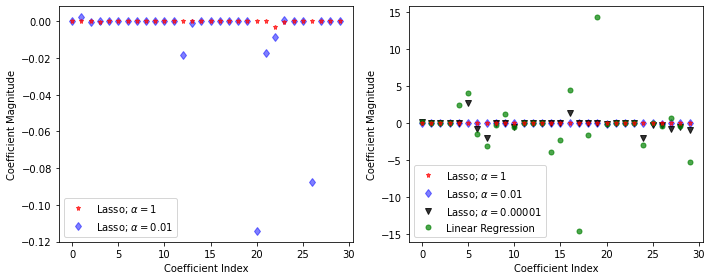

In [ ]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc=3)

plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Magnitude')
plt.legend(loc=3)

plt.tight_layout()
plt.show()

Question: how do you find the best $\lambda$?